# Data visualization

In [36]:
import pandas 
import joblib
import matplotlib.pyplot as plt
import numpy as np

### Load data

In [37]:
X_aligned_list = joblib.load('../data/interim/01_X_aligned_list.joblib')
y_aligned_list = joblib.load('../data/interim/02_y_aligned_list.joblib')

### Visualize the difference across labs

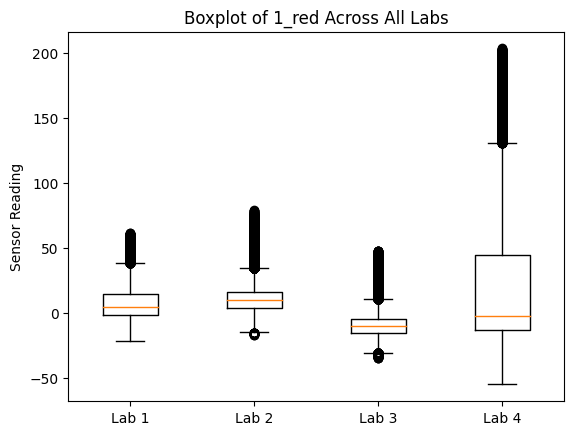

In [38]:
sensor = '1_red'
data_to_plot = [df[sensor] for df in X_aligned_list]

plt.boxplot(data_to_plot, labels=[f'Lab {i + 1}' for i in range(len(X_aligned_list))])
plt.title(f'Boxplot of {sensor} Across All Labs')
plt.ylabel('Sensor Reading')
plt.show()


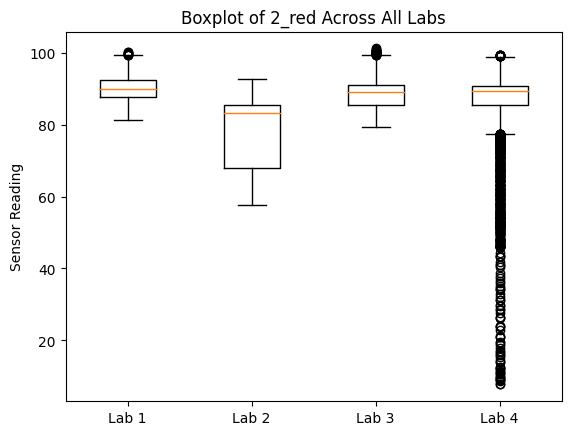

In [39]:
sensor = '2_red'
data_to_plot = [df[sensor] for df in X_aligned_list]

plt.boxplot(data_to_plot, labels=[f'Lab {i + 1}' for i in range(len(X_aligned_list))])
plt.title(f'Boxplot of {sensor} Across All Labs')
plt.ylabel('Sensor Reading')
plt.show()

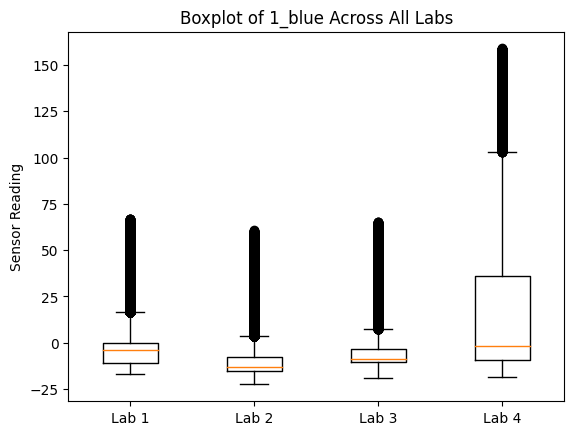

In [40]:
sensor = '1_blue'
data_to_plot = [df[sensor] for df in X_aligned_list]

plt.boxplot(data_to_plot, labels=[f'Lab {i + 1}' for i in range(len(X_aligned_list))])
plt.title(f'Boxplot of {sensor} Across All Labs')
plt.ylabel('Sensor Reading')
plt.show()

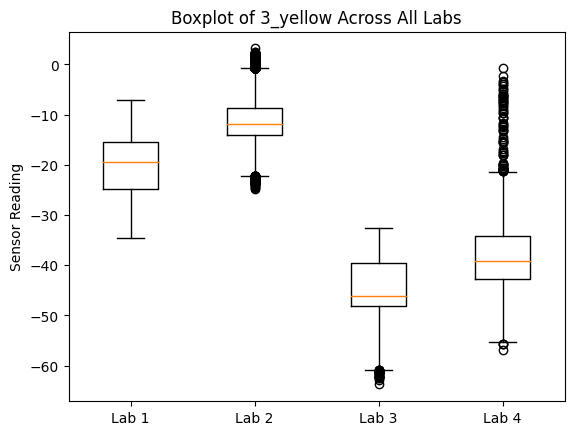

In [41]:
sensor = '3_yellow'
data_to_plot = [df[sensor] for df in X_aligned_list]

plt.boxplot(data_to_plot, labels=[f'Lab {i + 1}' for i in range(len(X_aligned_list))])
plt.title(f'Boxplot of {sensor} Across All Labs')
plt.ylabel('Sensor Reading')
plt.show()

In [42]:
for col in X_aligned_list[0].columns:
    if col != 'Time': 
        print(f"\nSensor: {col}")
        for i, df in enumerate(X_aligned_list):
            print(f"  Lab {i + 1}: Mean={df[col].mean():.2f}, Std={df[col].std():.2f}")



Sensor: 1_red
  Lab 1: Mean=7.30, Std=13.42
  Lab 2: Mean=11.83, Std=12.24
  Lab 3: Mean=-8.90, Std=10.27
  Lab 4: Mean=27.90, Std=61.07

Sensor: 1_blue
  Lab 1: Mean=-1.83, Std=13.71
  Lab 2: Mean=-9.68, Std=10.36
  Lab 3: Mean=-5.45, Std=11.22
  Lab 4: Mean=24.28, Std=48.99

Sensor: 1_yellow
  Lab 1: Mean=-5.80, Std=4.78
  Lab 2: Mean=-3.81, Std=6.66
  Lab 3: Mean=-11.59, Std=4.99
  Lab 4: Mean=6.16, Std=27.93

Sensor: 2_red
  Lab 1: Mean=89.84, Std=3.12
  Lab 2: Mean=78.65, Std=9.29
  Lab 3: Mean=88.59, Std=3.48
  Lab 4: Mean=88.33, Std=4.17

Sensor: 2_blue
  Lab 1: Mean=-21.98, Std=14.66
  Lab 2: Mean=-25.39, Std=13.09
  Lab 3: Mean=-37.64, Std=14.10
  Lab 4: Mean=-36.26, Std=14.44

Sensor: 2_yellow
  Lab 1: Mean=-25.10, Std=8.07
  Lab 2: Mean=-25.42, Std=5.53
  Lab 3: Mean=-36.78, Std=6.97
  Lab 4: Mean=-34.06, Std=8.05

Sensor: 3_red
  Lab 1: Mean=-38.21, Std=4.63
  Lab 2: Mean=-46.79, Std=3.13
  Lab 3: Mean=-39.90, Std=3.60
  Lab 4: Mean=-38.75, Std=3.60

Sensor: 3_blue
  Lab 1

These sensors are inconsistent across labs in both mean and spread.

Each lab has their own pattern.

### Look at distributions

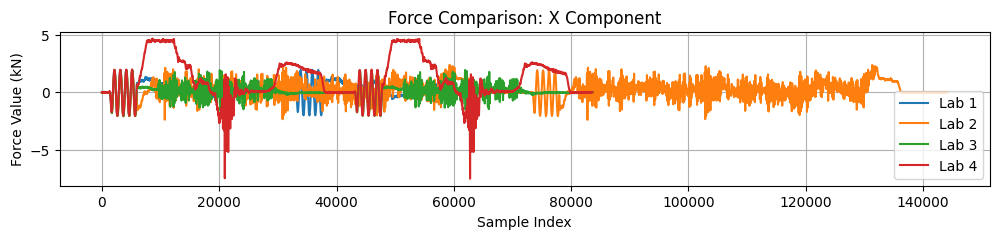

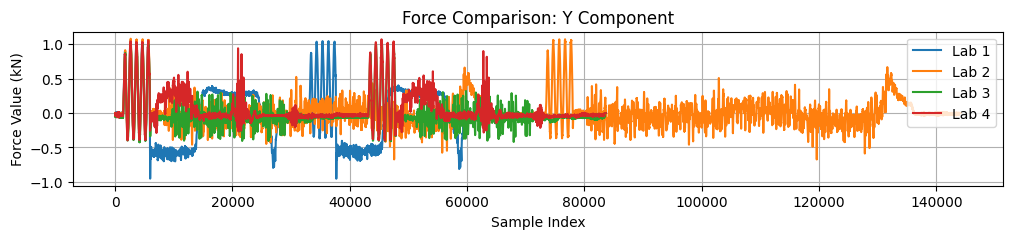

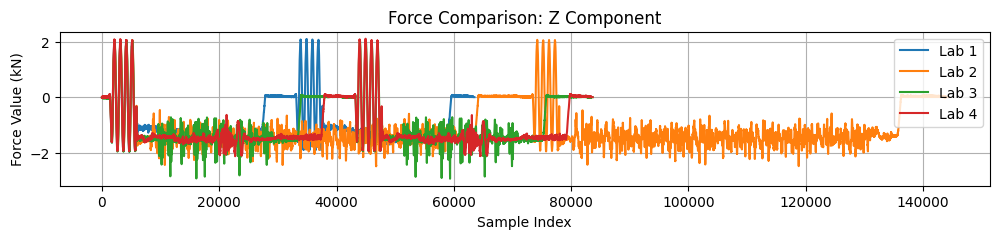

In [47]:
def plot_force_comparison(y_aligned_list, lab_names=None):
    """
    Plot X, Y, Z force values for each labs. 
    """
    if lab_names is None:
        lab_names = [f'Lab {i+1}' for i in range(len(y_aligned_list))]

    # Map your exact column labels
    force_components = {
        'X (kN)': 'X',
        'Y (kN)': 'Y',
        'Z (kN)': 'Z'
    }

    for col_label, component_name in force_components.items():
        plt.figure(figsize=(12, 2))
        for idx, y_df in enumerate(y_aligned_list):
            plt.plot(y_df[col_label].values, label=lab_names[idx])
        
        plt.title(f'Force Comparison: {component_name} Component')
        plt.xlabel('Sample Index')
        plt.ylabel('Force Value (kN)')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage
plot_force_comparison(y_aligned_list)


The force profiles show a variety of loading behaviors, including:
- Cyclic oscillations (repeating spikes)
- Step-wise loading (sudden force increases or decreases)
- Steady-state force levels with random noise

X-component:
- Lab 4 (Red) shows high-amplitude oscillations and large peaks and troughs up to ±5 kN, suggesting high dynamic force variation.
- Lab 2 (Orange) shows a gradual trend with lower magnitude, possibly smoother and slower force changes.
- Labs 1 and 3 (Blue and Green) seem to oscillate around 0, but with lower amplitude, indicating less dynamic force variation.\

Y-component:
- Lab 4 (Red) shows strong periodic spikes at multiple time intervals.
- Lab 2 and 3 (Orange and Green) appears less dynamic but consistently noisy, possibly indicating longer steady-state behavior.
- Lab 1 (Blue) shows multiple regions of high activity, suggesting intermittent loading patterns.

Z-component:
- Lab 4 (Red) again shows strong periodic spikes early on, similar to X and Y.
- Lab 1 (Blue) shows repeated negative force drops, particularly between sample 20,000 to 40,000 and again around 60,000.
- Lab 2 (Orange) shows a long period of relatively low but noisy activity after sample 80,000, suggesting a steady but noisy loading state.
- Lab 3 (Green) maintains low-amplitude fluctuations with no strong peaks, indicating less dynamic behavior.

The magnitude and pattern of change differ across X, Y, and Z:
- X Component: Shows both high-amplitude spikes and gradual trends. (-7 to +5 kN)
- Y Component: Shows oscillations and steady-state behavior with lower amplitude compared to X. (-1 to +1 kN)
- Z Component: Includes step-like transitions and repeating pulses in some parts. (-3 to +3 kN)


Generating plots for Lab 1...


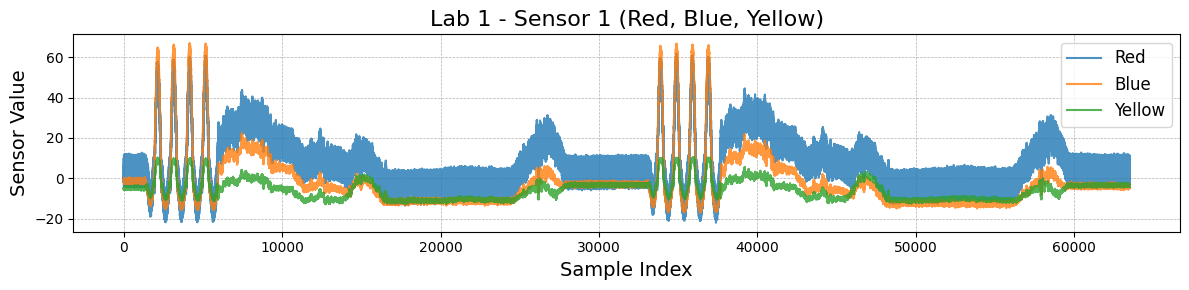

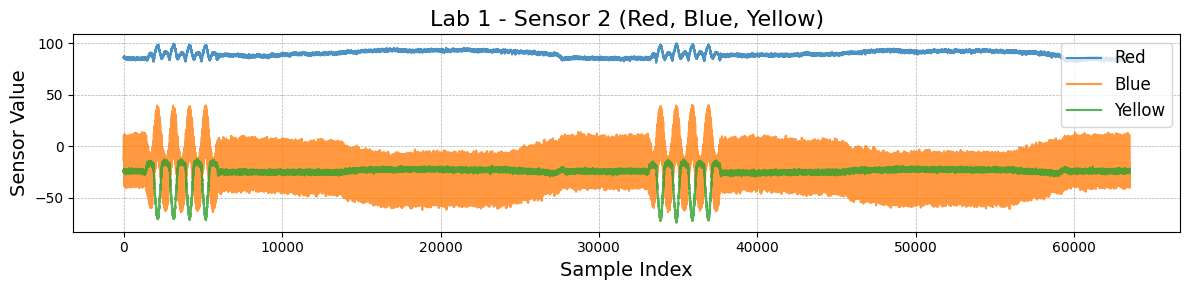

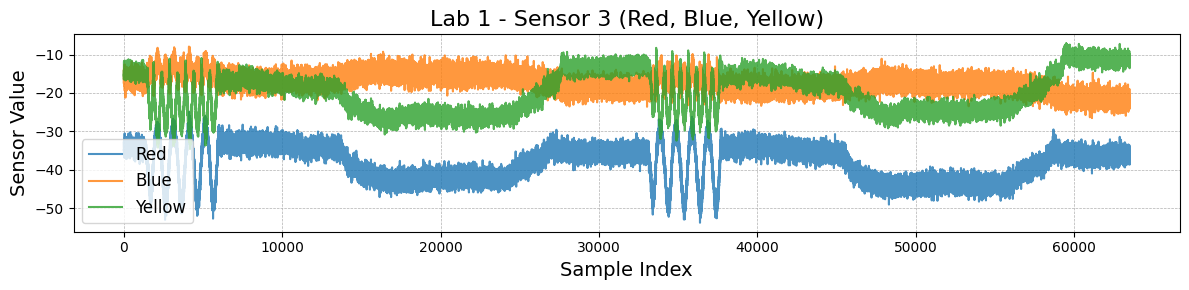

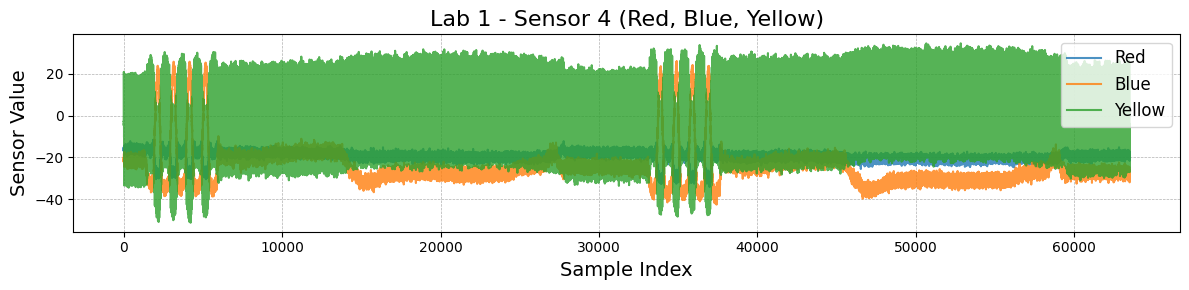

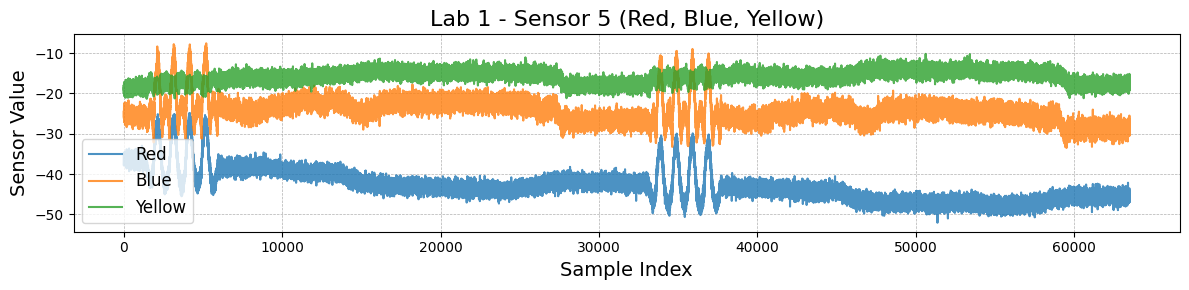

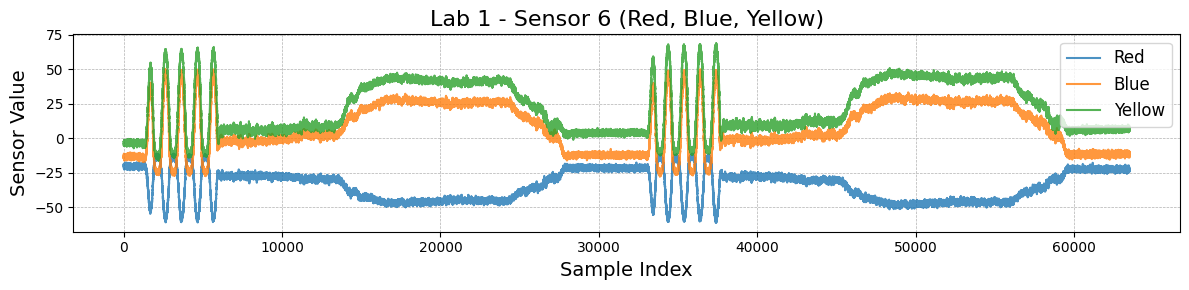

Generating plots for Lab 2...


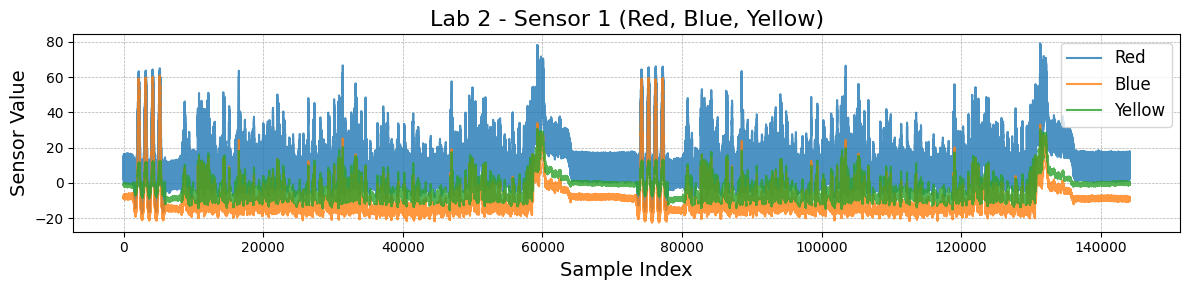

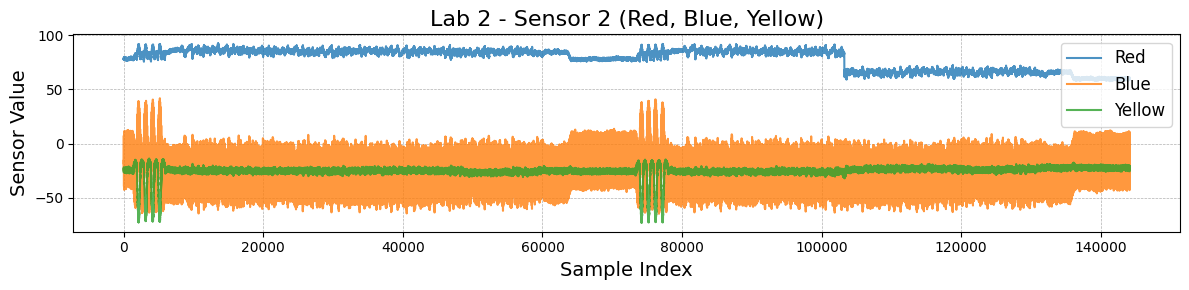

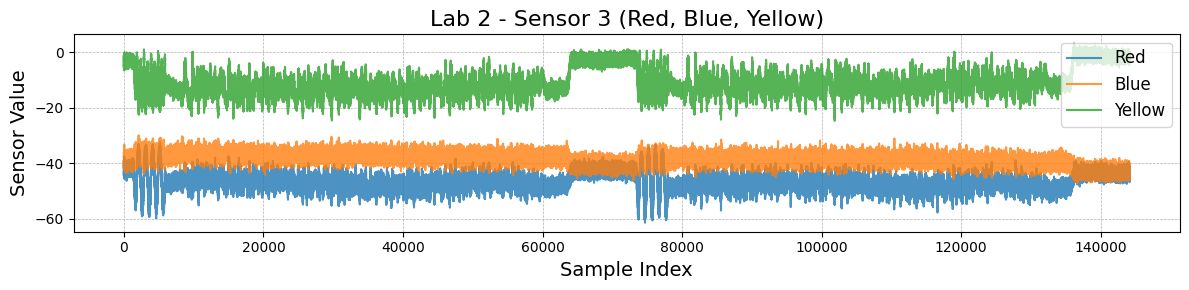

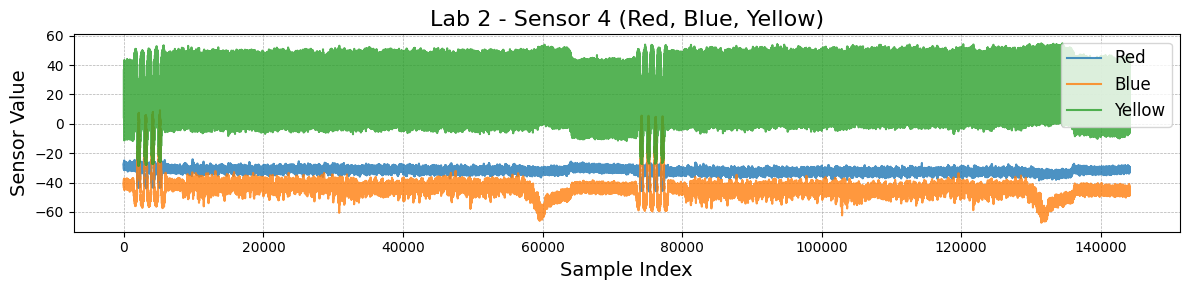

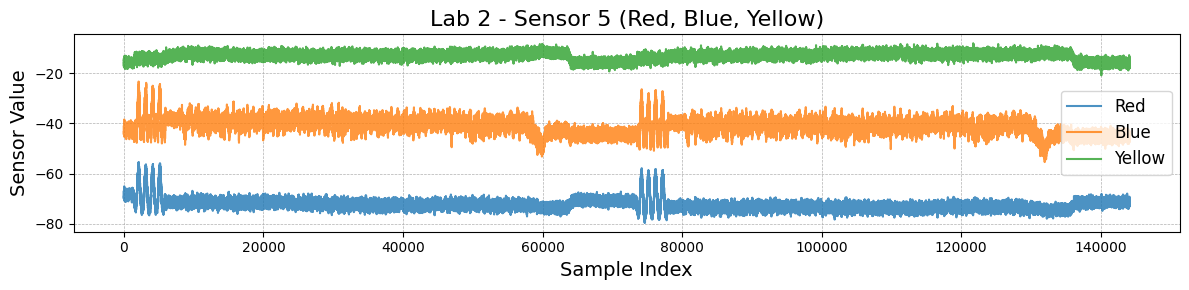

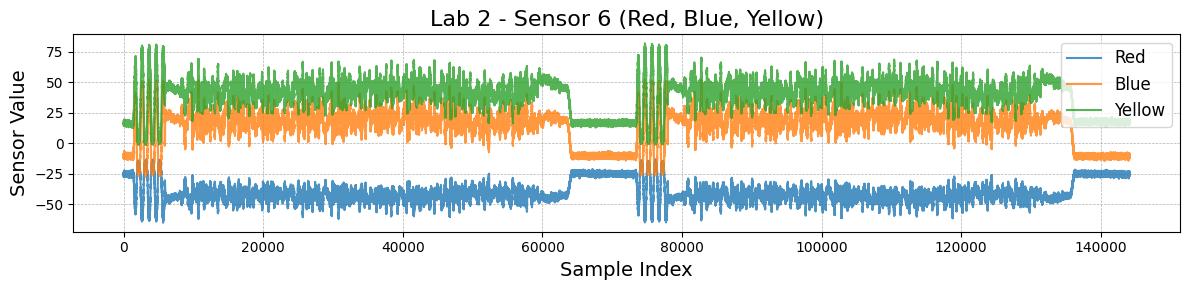

Generating plots for Lab 3...


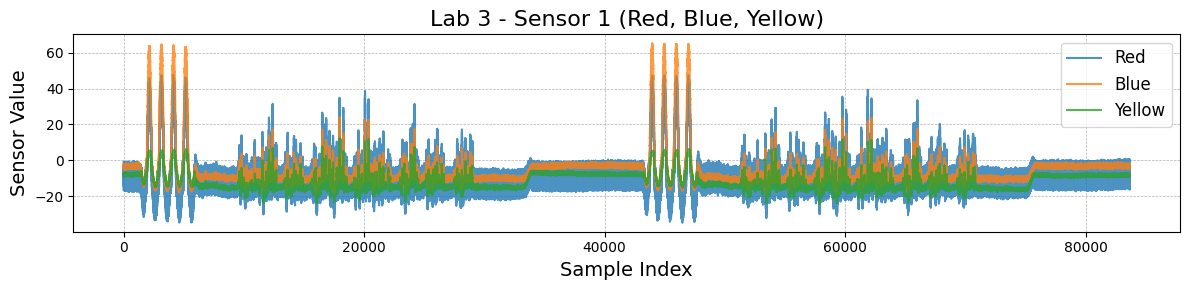

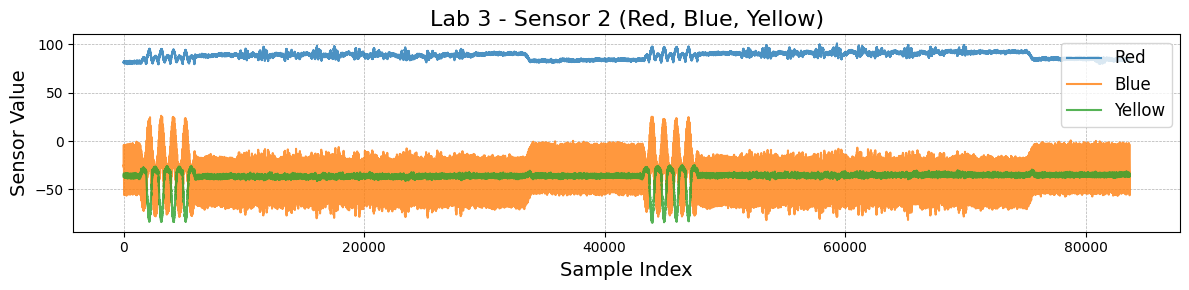

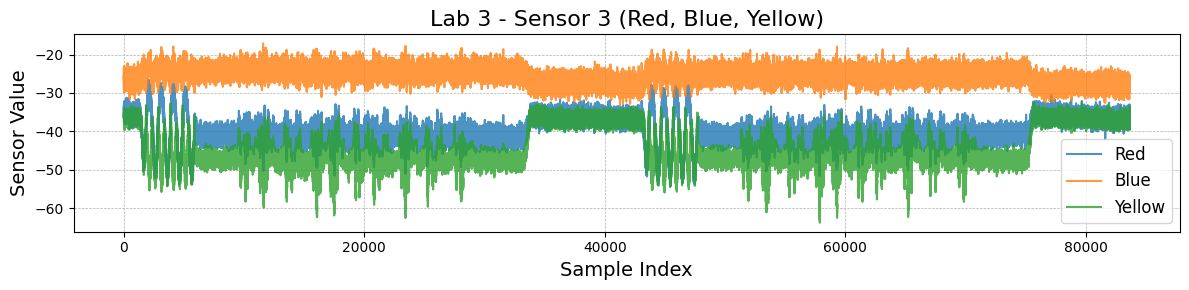

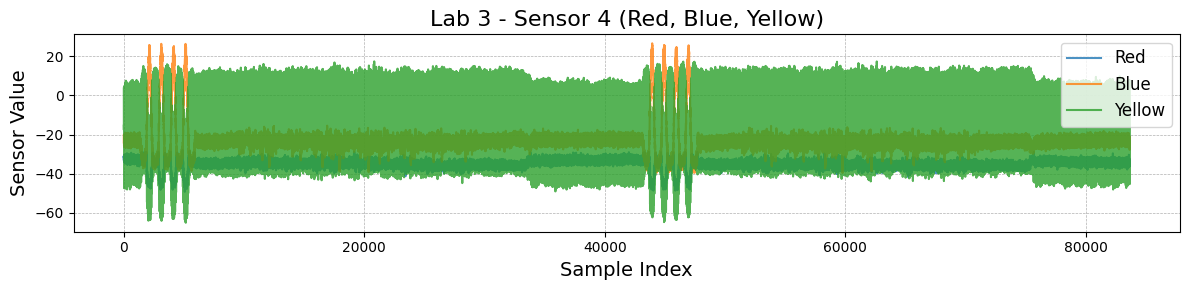

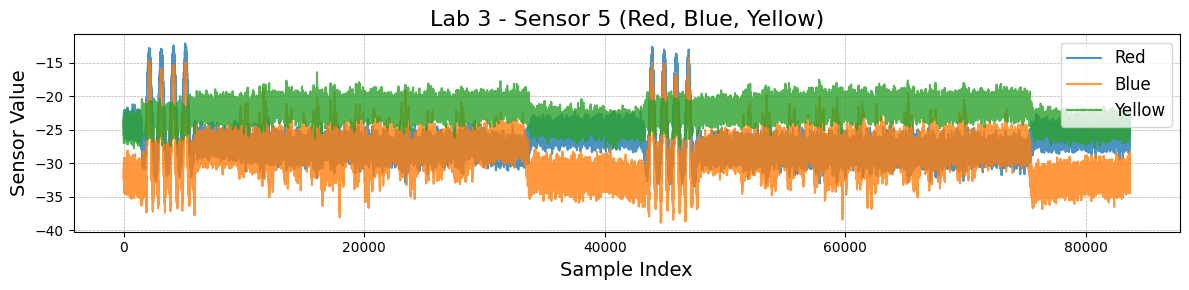

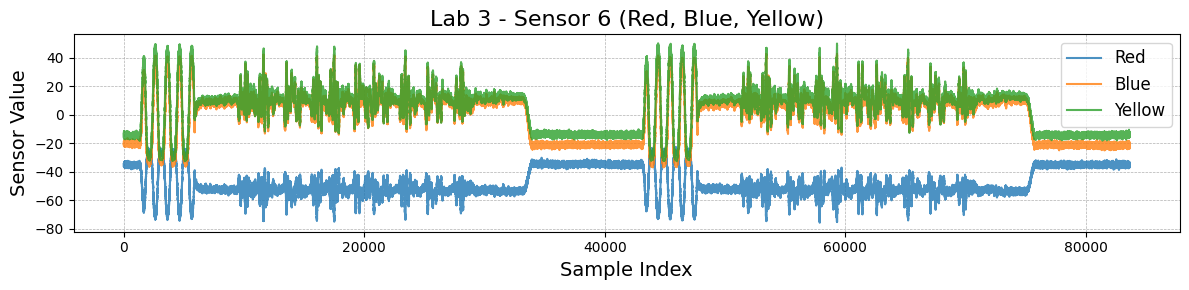

Generating plots for Lab 4...


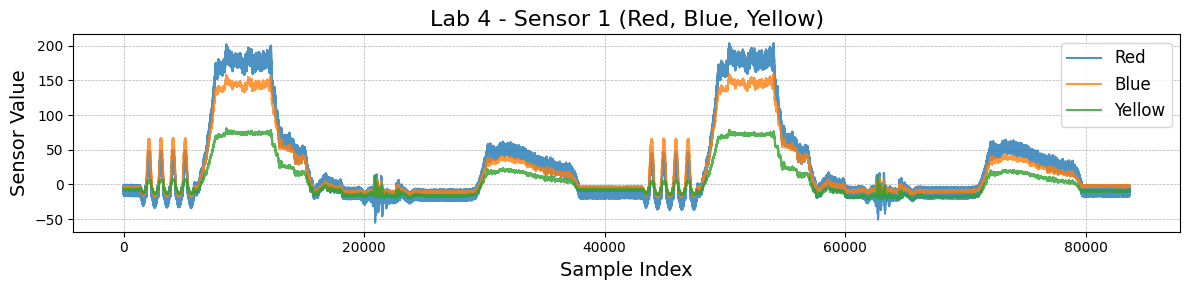

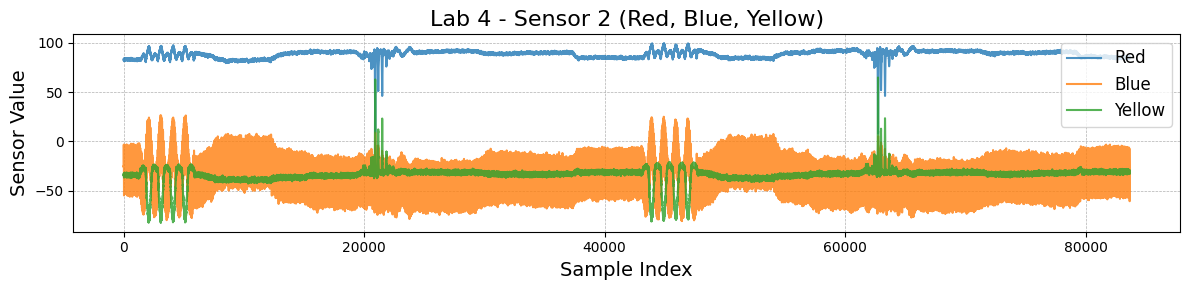

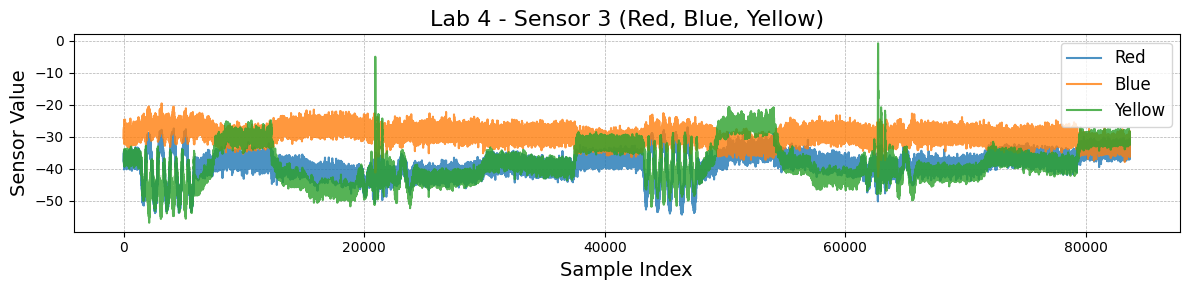

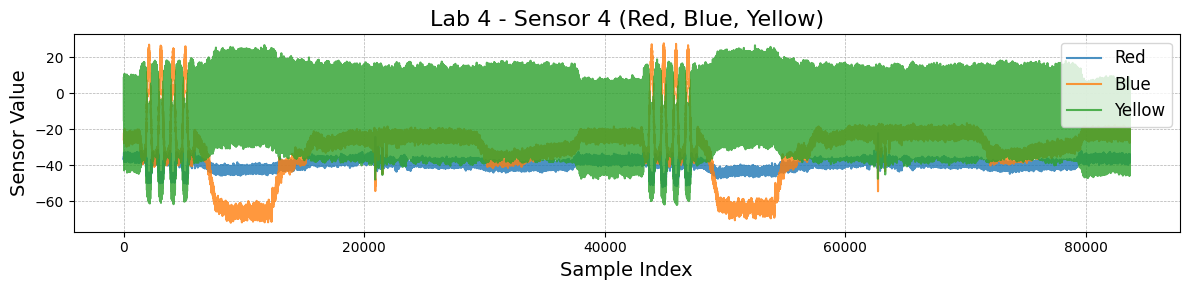

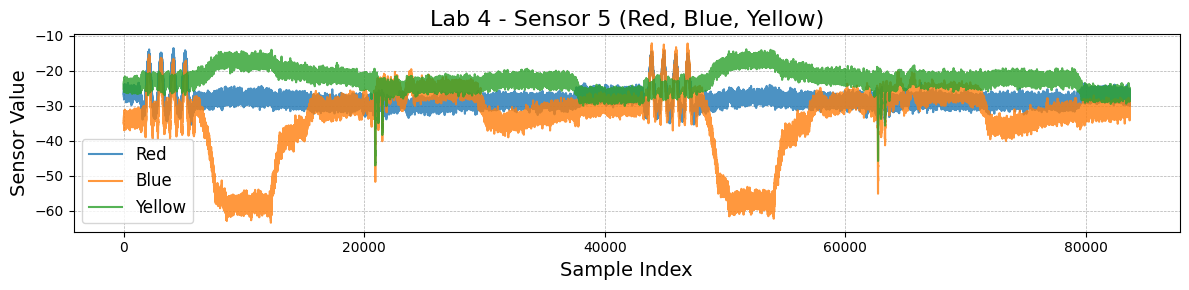

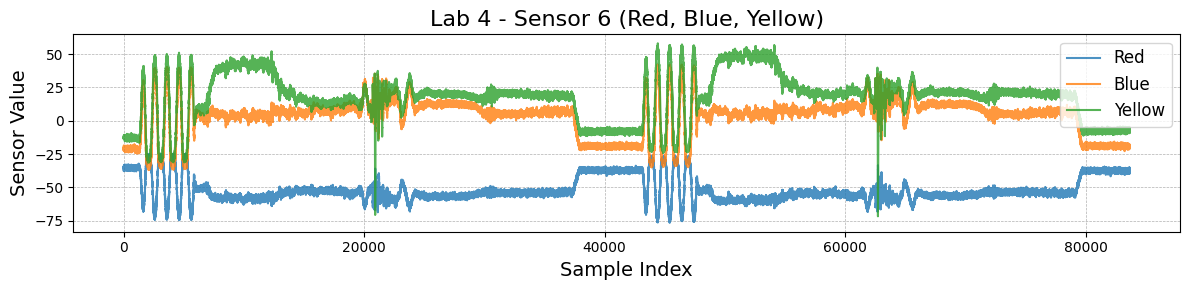

In [55]:
def plot_per_lab_per_sensor(X_aligned_list):
    """
    For each lab, plot all colors (red, blue, yellow) for each sensor (1 to 6).
    """
    for idx, X_df in enumerate(X_aligned_list):
        print(f"Generating plots for Lab {idx + 1}...")
        for sensor_num in range(1, 7):
            plt.figure(figsize=(12, 3))
            for color in ['red', 'blue', 'yellow']:
                sensor_col = f'{sensor_num}_{color}'
                if sensor_col in X_df.columns:
                    plt.plot(X_df[sensor_col].values, label=f'{color.capitalize()}', linewidth=1.5, alpha=0.8)
            
            plt.title(f'Lab {idx + 1} - Sensor {sensor_num} (Red, Blue, Yellow)', fontsize=16)
            plt.xlabel('Sample Index', fontsize=14)
            plt.ylabel('Sensor Value', fontsize=14)
            plt.legend(fontsize=12)
            plt.grid(True, linestyle='--', linewidth=0.5)
            plt.tight_layout()
            plt.show()

# Example usage
plot_per_lab_per_sensor(X_aligned_list)


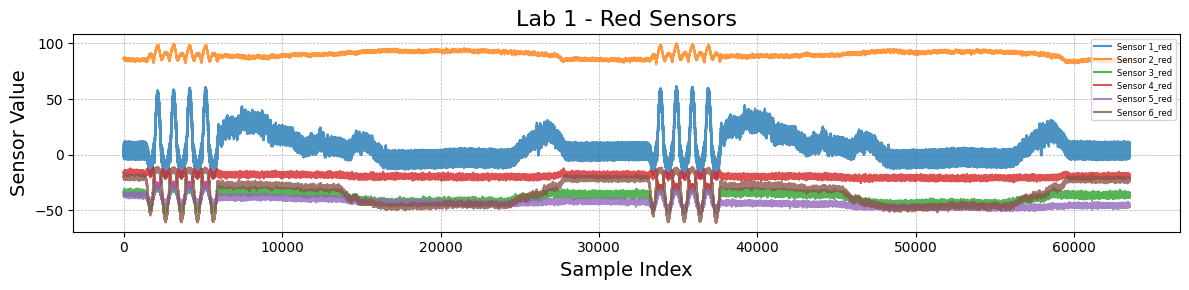

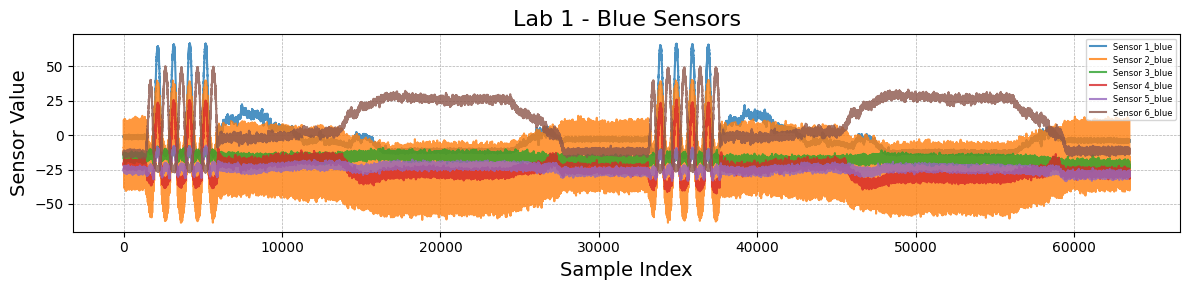

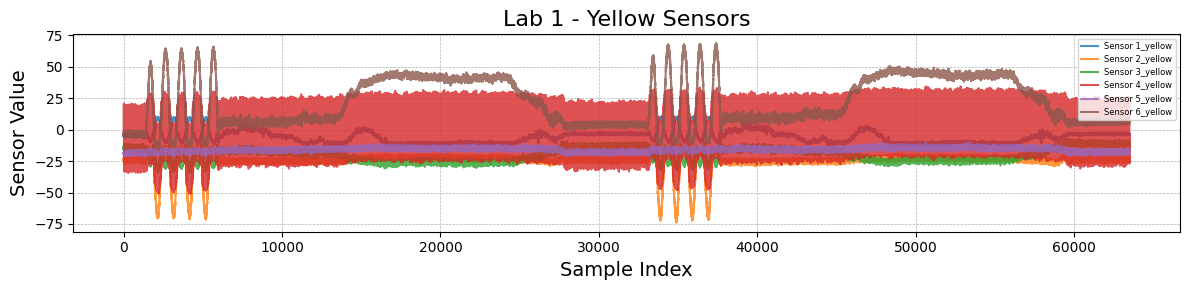

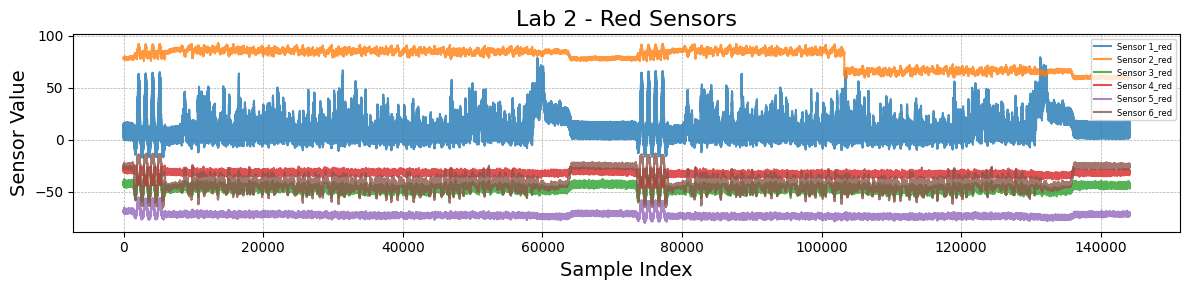

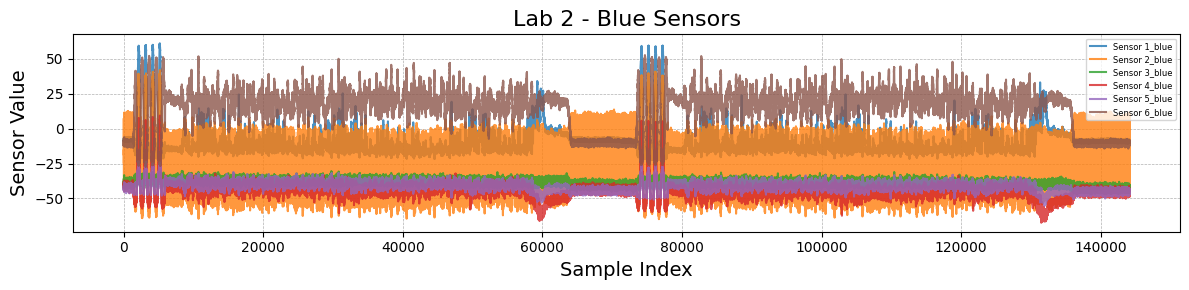

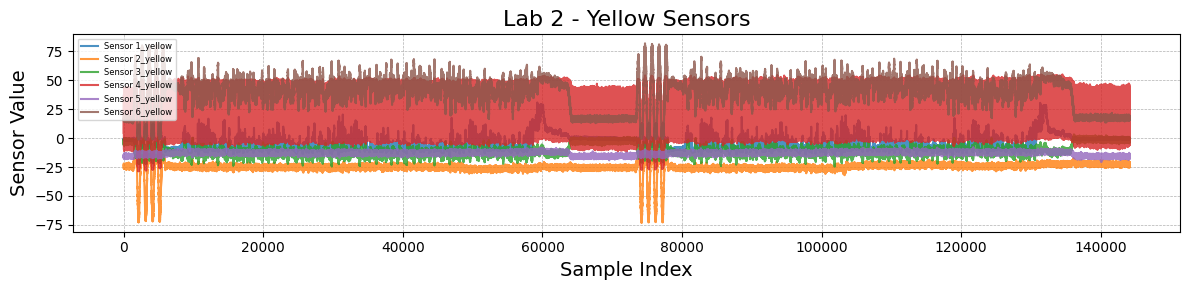

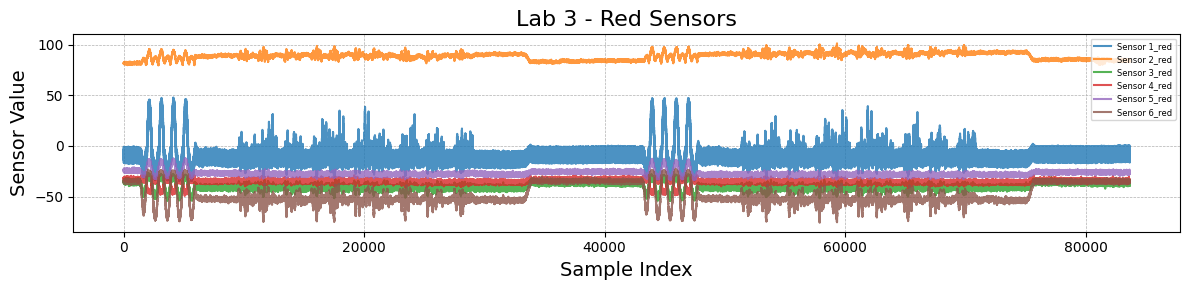

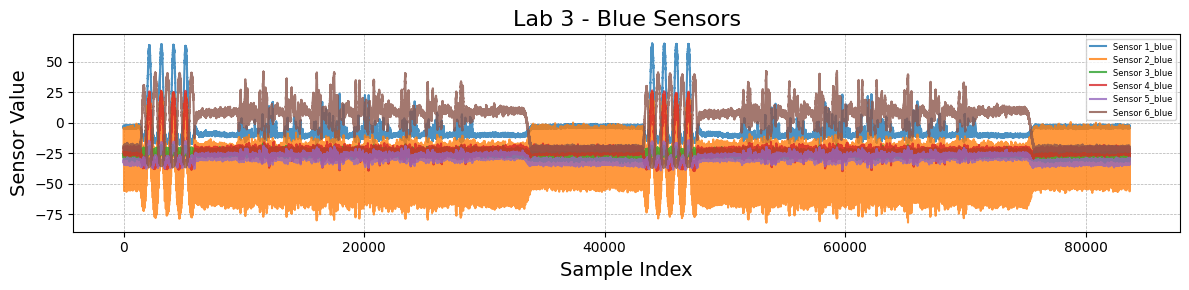

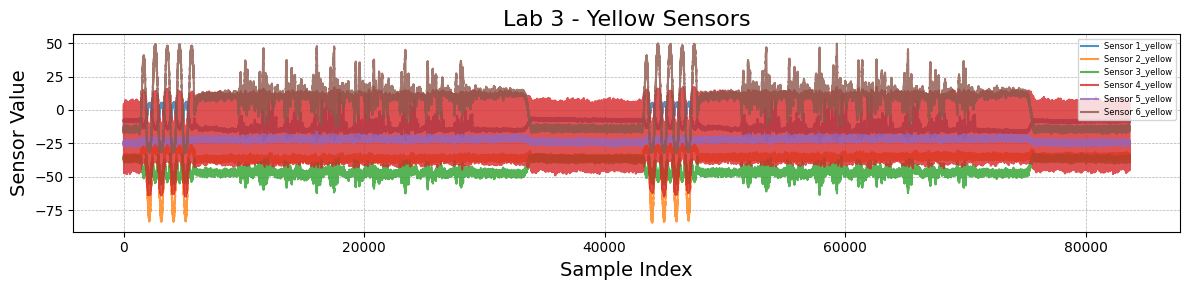

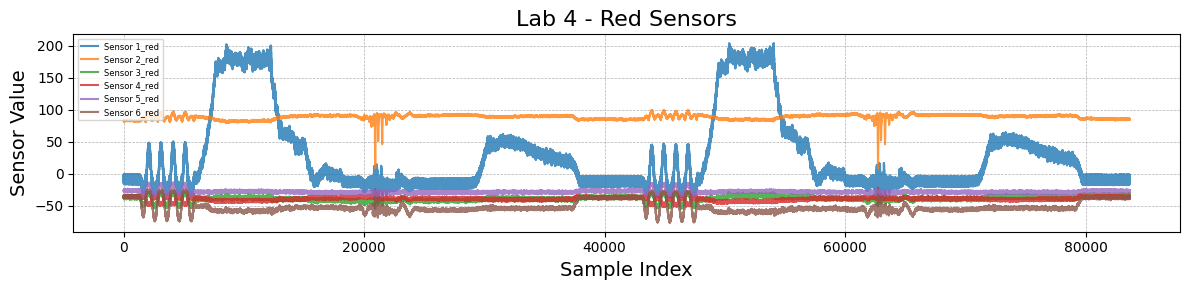

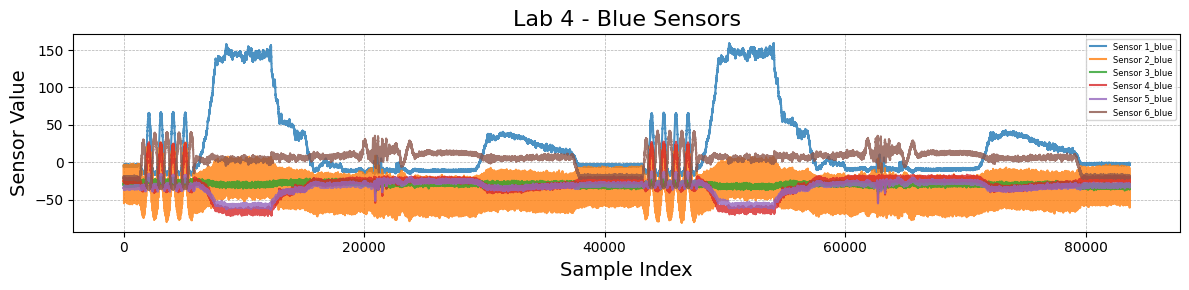

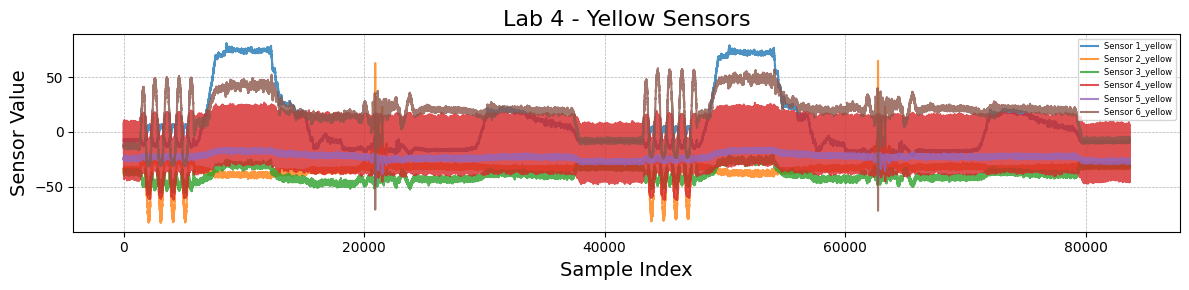

In [56]:
import matplotlib.pyplot as plt

def plot_per_lab_by_color(X_aligned_list, colors=['red', 'blue', 'yellow']):
    """
    plot to compare each color by each lab 
    """
    for idx, X_df in enumerate(X_aligned_list):
        for color in colors:
            plt.figure(figsize=(12, 3))
            
            # Collect all sensor columns of the given color for this lab
            sensor_columns = [f'{sensor_num}_{color}' for sensor_num in range(1, 7)]
            
            for sensor_col in sensor_columns:
                if sensor_col in X_df.columns:
                    plt.plot(X_df[sensor_col].values, label=f'Sensor {sensor_col}', linewidth=1.5, alpha=0.8)
            
            plt.title(f'Lab {idx + 1} - {color.capitalize()} Sensors', fontsize=16)
            plt.xlabel('Sample Index', fontsize=14)
            plt.ylabel('Sensor Value', fontsize=14)
            plt.legend(fontsize=6, ncol=1)
            plt.grid(True, linestyle='--', linewidth=0.5)
            plt.tight_layout()
            plt.show()

# Example usage
plot_per_lab_by_color(X_aligned_list)


All sensors in lab 1 have spikes at around sample 5000 and 35000 for all 3 colors. 
For Lab 4, sensor 1 is always have spikes at samples 10000 and 50000 for all 3 colors. 

In [44]:
def visualize_per_lab(X_list, cols_per_row=3):
    """
    Visualizes all features in each lab.

    Args:
        X_list (list): List of DataFrames (one per lab).
        cols_per_row (int): Number of plots per row in the grid.
    """
    for i, df in enumerate(X_list):
        print(f"\nLab {i + 1} - Feature Distributions")

        # Filter feature columns (excluding 'Time')
        feature_cols = [col for col in df.columns if col != 'Time']
        num_features = len(feature_cols)
        rows = (num_features + cols_per_row - 1) // cols_per_row

        # Create subplot grid
        fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 4 * rows))
        axes = axes.flatten()

        for idx, col in enumerate(feature_cols):
            df[col].hist(bins=50, ax=axes[idx])
            axes[idx].set_title(f"{col}")
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Frequency')

        # Hide any unused subplots
        for idx in range(len(feature_cols), len(axes)):
            axes[idx].axis('off')

        plt.tight_layout()
        plt.show()



Lab 1 - Feature Distributions


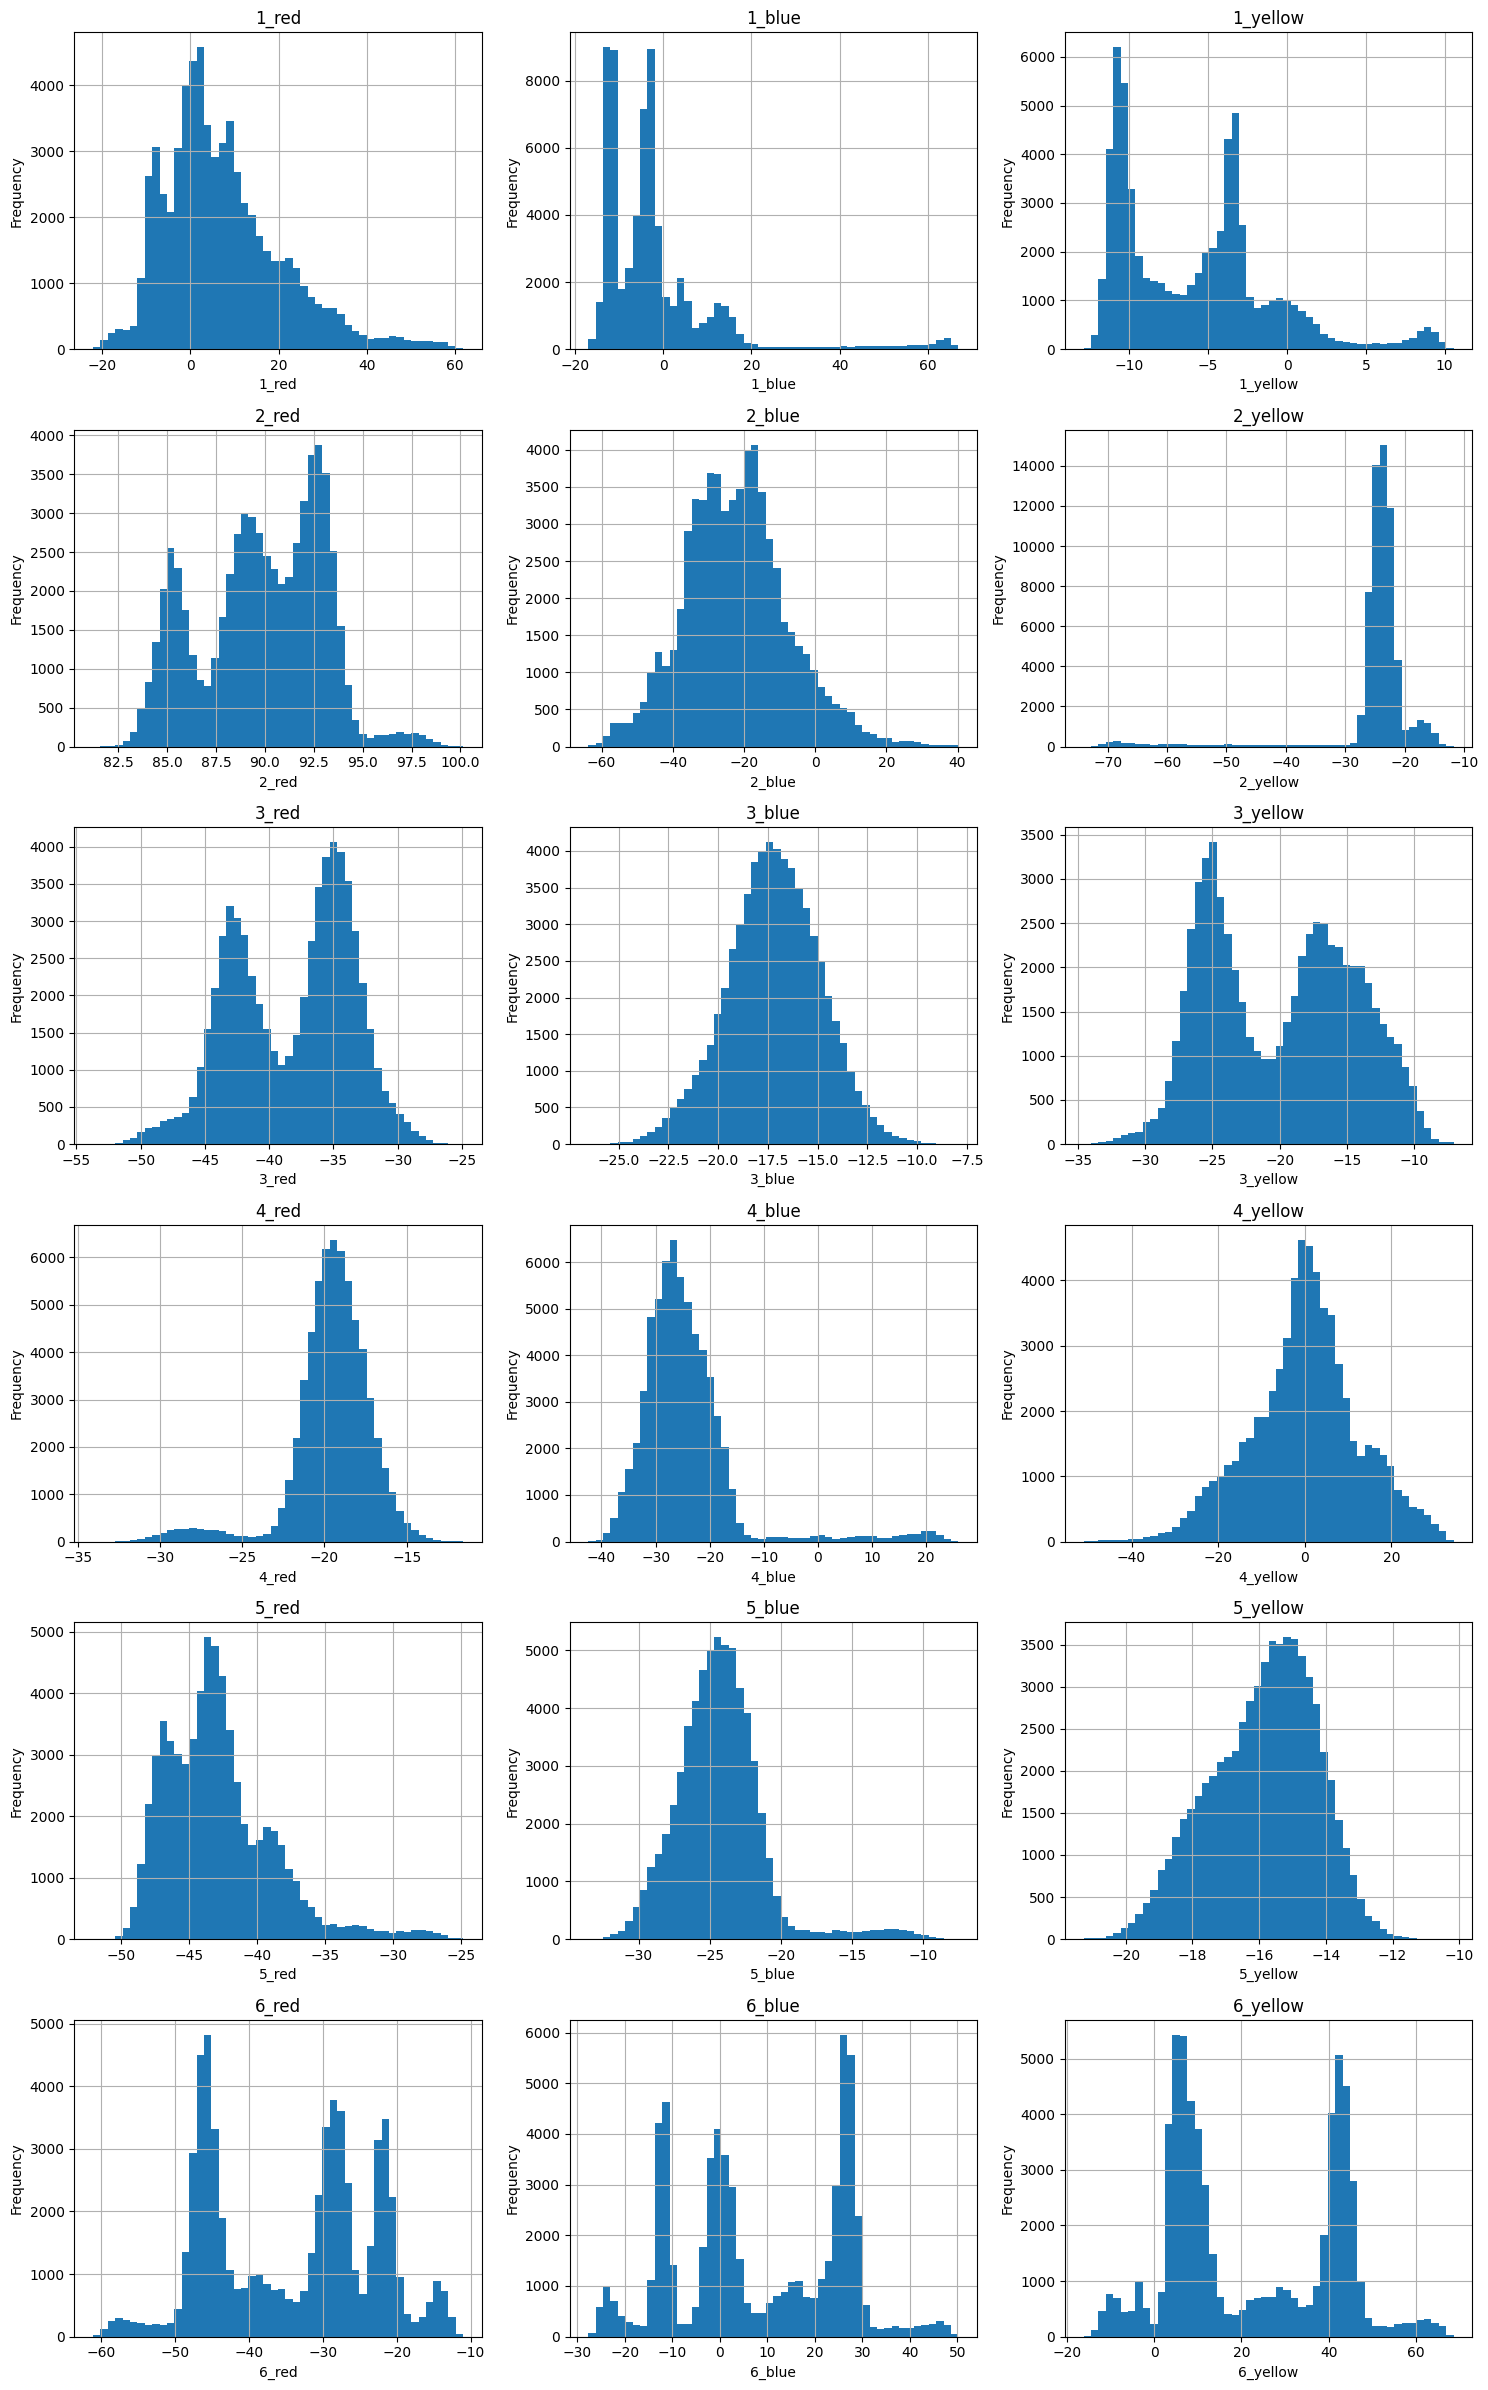


Lab 2 - Feature Distributions


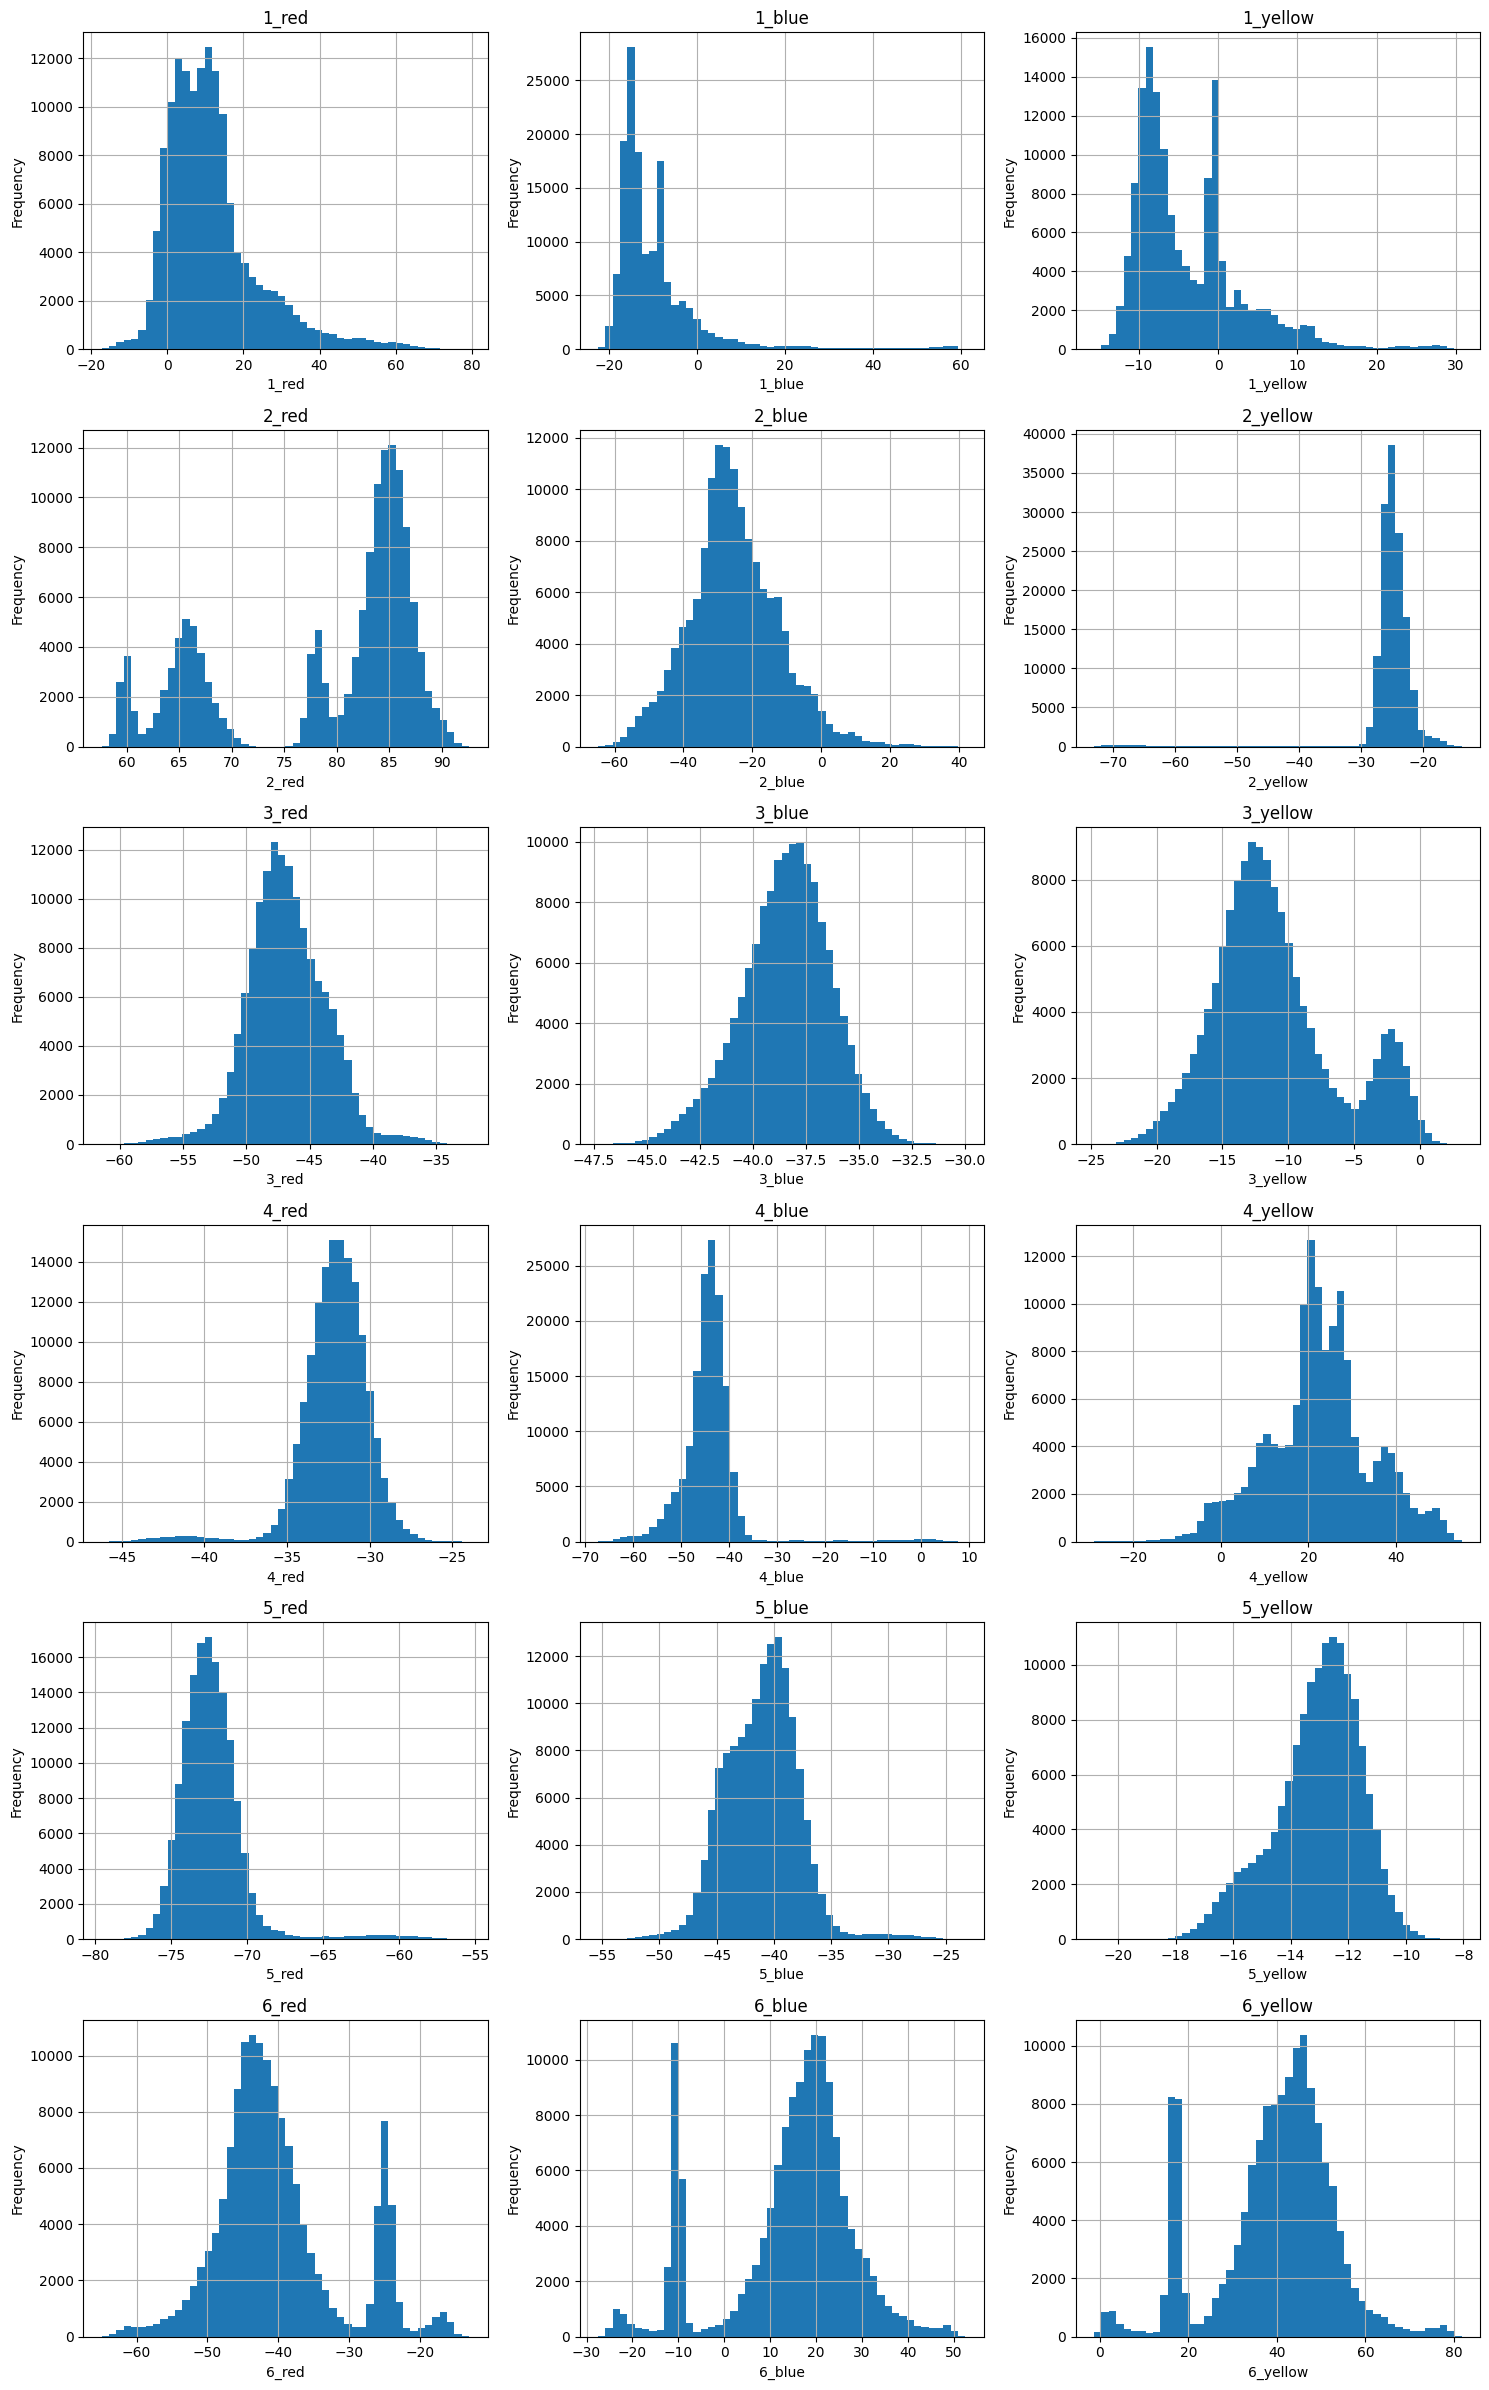


Lab 3 - Feature Distributions


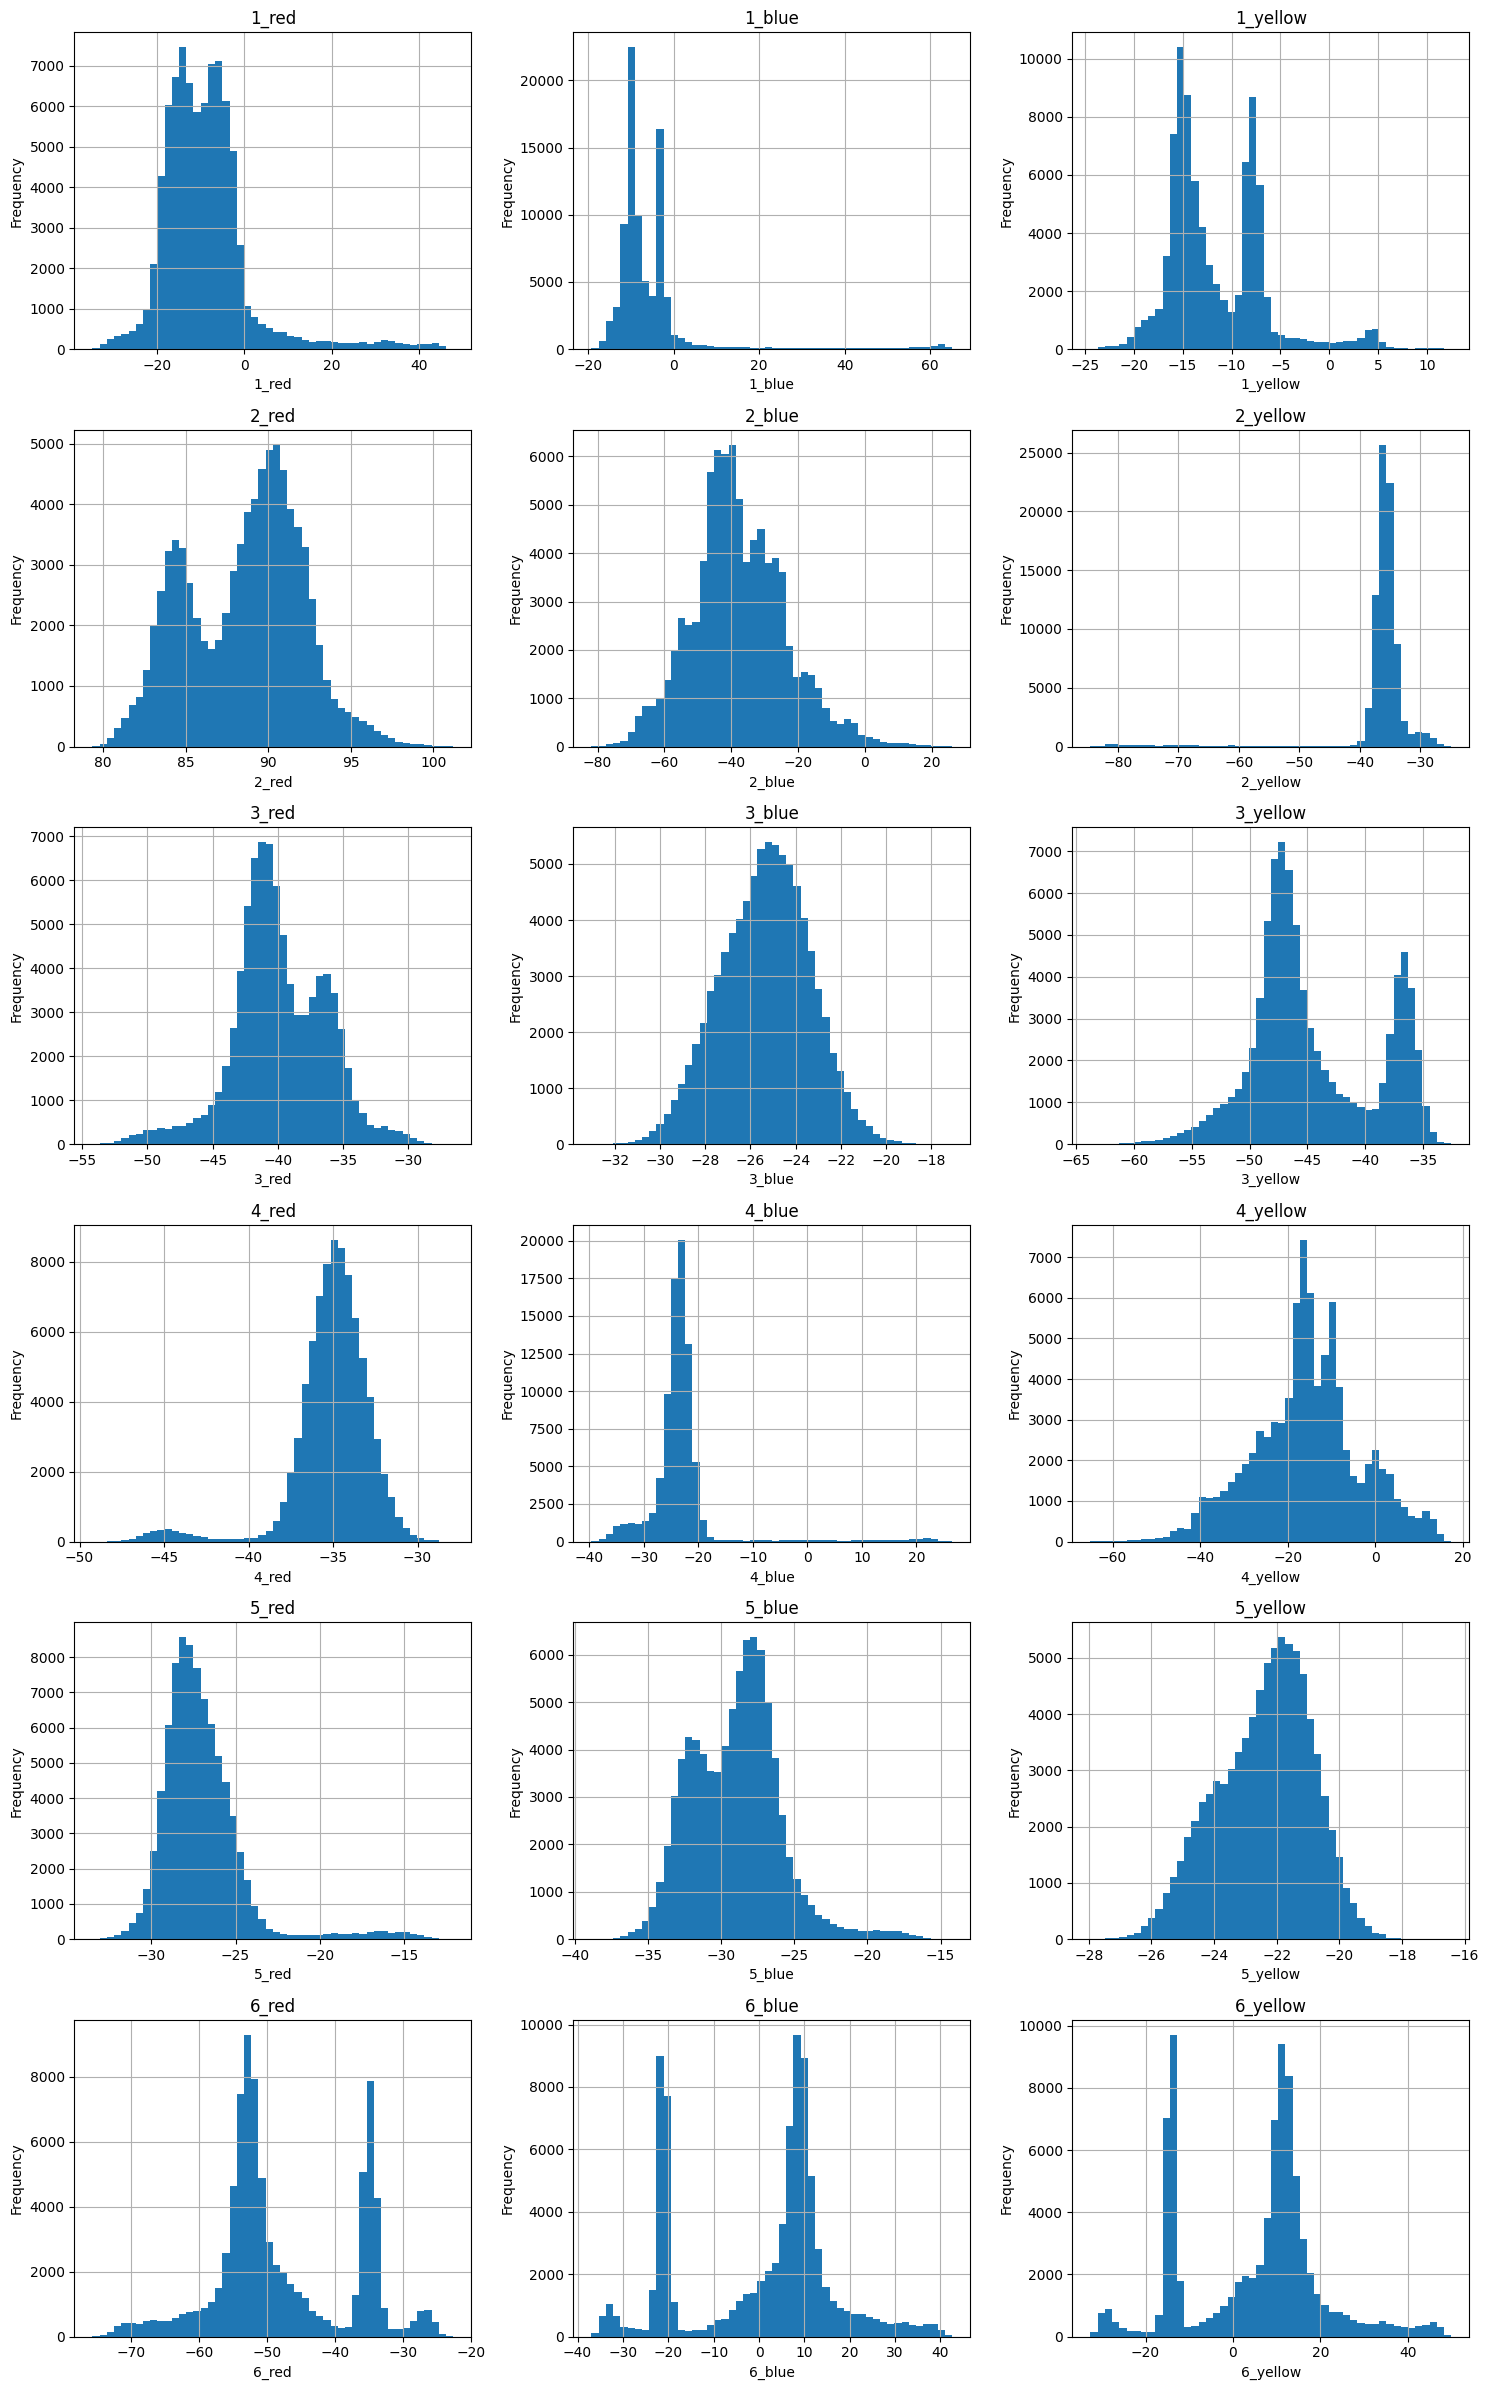


Lab 4 - Feature Distributions


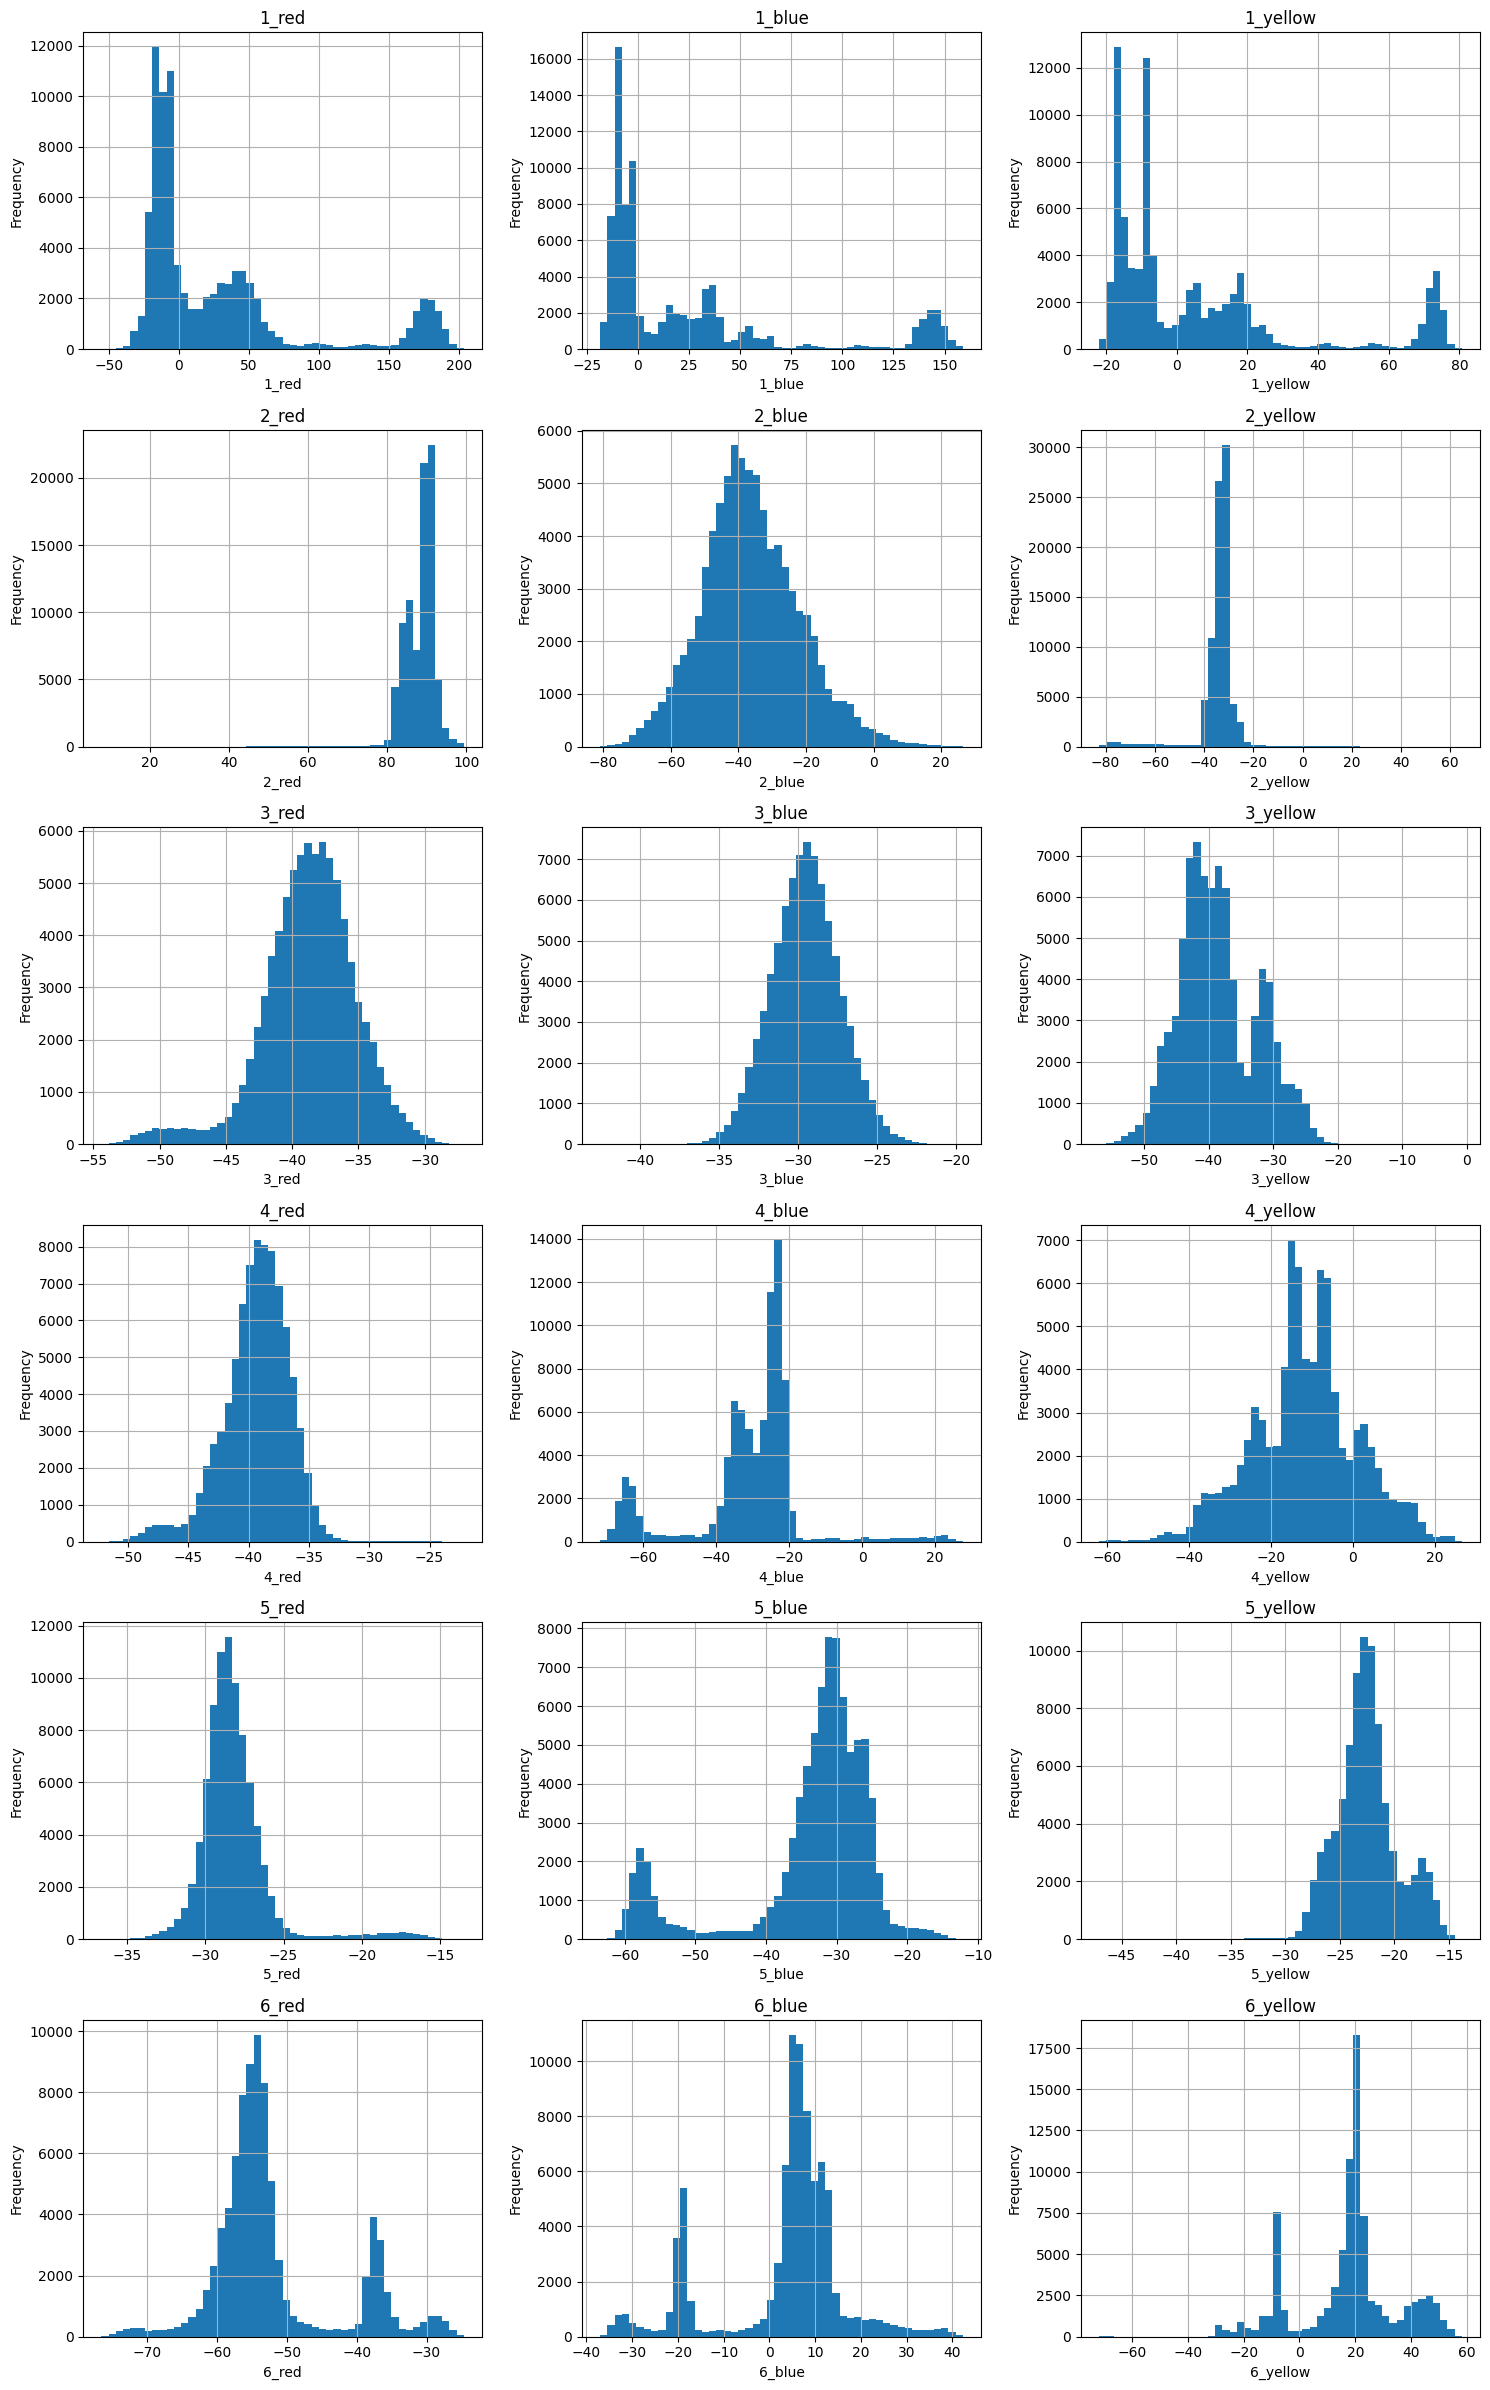

In [45]:
visualize_per_lab(X_aligned_list)

### Check if time is useful

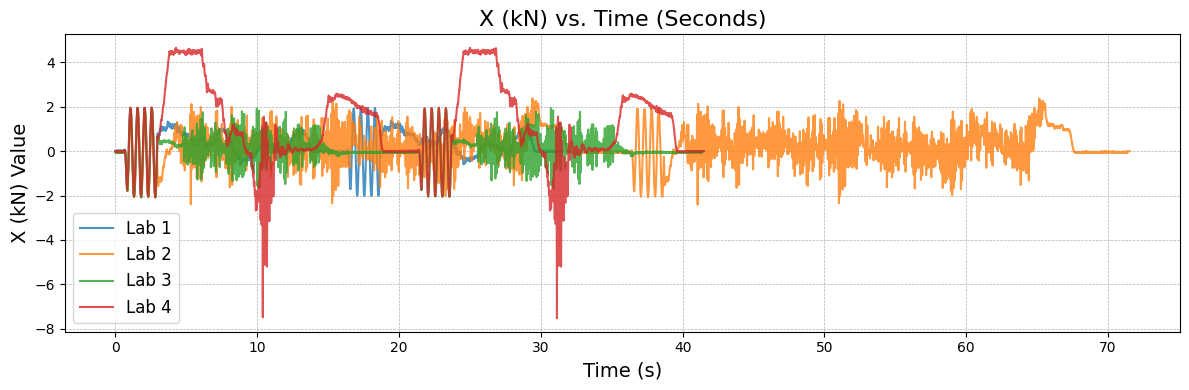

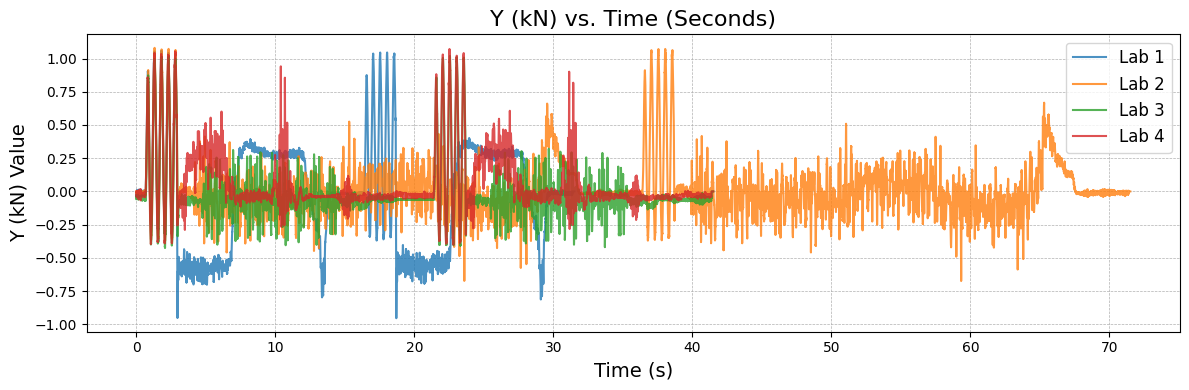

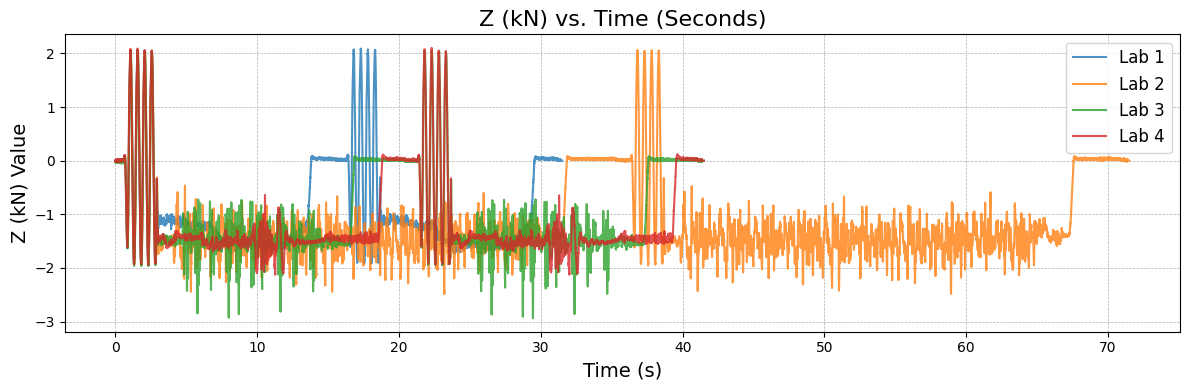

In [ ]:
def plot_force_over_actual_time(X_aligned_list, y_aligned_list, component_labels=['X (kN)', 'Y (kN)', 'Z (kN)'], time_col='Time'):
    """
    Plot force components against actual Time for all labs.
    """
    for component in component_labels:
        plt.figure(figsize=(12, 4))
        for idx, (X_df, y_df) in enumerate(zip(X_aligned_list, y_aligned_list)):
            plt.plot(X_df[time_col].values, y_df[component].values, label=f'Lab {idx + 1}', alpha=0.8)
        
        plt.title(f'{component} vs. Time (Seconds)', fontsize=16)
        plt.xlabel('Time (s)', fontsize=14)
        plt.ylabel(f'{component} Value', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()

# Example usage
plot_force_over_actual_time(X_aligned_list, y_aligned_list)

Blue Lab (Lab 1) shows distinct spikes in X, Y, Z components around 20 seconds.

Lab 4 (Red) shows multiple oscillations clustered before 10s and between 20s–30s.

Lab 2 (Orange) tends to stabilize after 40s with continuous noise.

In [60]:
def check_time_force_correlation(X_aligned_list, y_aligned_list, component_labels=['X (kN)', 'Y (kN)', 'Z (kN)'], time_col='Time'):
    """
    Compute and print correlation between Time and Force components for each lab.
    """
    for idx, (X_df, y_df) in enumerate(zip(X_aligned_list, y_aligned_list)):
        print(f"\nLab {idx + 1}")
        time_values = X_df[time_col].values
        for component in component_labels:
            force_values = y_df[component].values
            corr = np.corrcoef(time_values, force_values)[0, 1]
            print(f"  Correlation with {component}: {corr:.4f}")

# Example usage
check_time_force_correlation(X_aligned_list, y_aligned_list)



Lab 1
  Correlation with X (kN): -0.0287
  Correlation with Y (kN): 0.0387
  Correlation with Z (kN): -0.0813

Lab 2
  Correlation with X (kN): 0.0760
  Correlation with Y (kN): -0.0325
  Correlation with Z (kN): 0.0581

Lab 3
  Correlation with X (kN): -0.0229
  Correlation with Y (kN): -0.1332
  Correlation with Z (kN): 0.0614

Lab 4
  Correlation with X (kN): -0.0714
  Correlation with Y (kN): -0.2111
  Correlation with Z (kN): -0.0428


Despite low linear correlations (-0.21 to +0.07), these plots clearly show distinct patterns emerging at certain time phases.